# **xSoc Python Course** - Week 5

### *Objects, Libraries, and Readability*

🖋️ *Written by Alia & Edmund from [UWCS](uwcs.co.uk)*

This week we will look at objects, and how they are used in libaries. We will then investigate how to write readable code.

In this lecture, we will aim to cover:

- Introducing objects
- Using libraries
- Writing readable code

## A very brief introduction to objects

### Why do we need objects?

Suppose you have some square pieces of coloured paper, and you want to write some code which models them. One way to do this is using a dictionary to store data about all the interesting aspects of the square, for example:

In [ ]:
square = {
    "width": 3,
    "colour": "blue"
}

Now we have this representation of the real world, we might want to use code to calculate some properties about it! For example, we can write a function which calculates a square's area:

In [ ]:
def calculate_area(square):
    # Remember that `**` is the power operator
    return square["width"] ** 2

Unfortunately, there are a few issues with this representation. For example, because a dictionary is a dynamic data structure, if you mispell a key name, this will only be caught at run-time. This also means that IDEs (such as Visual Studio Code) won't be able to provide you with helpful hints.

Fortunately, there is a better way! In programming, objects are structures which allow us to bundle together data and code which uses that data. They are helpful as they make it easy to represent things in the real world.

### Getting started with classes and objects

Classes are pieces of code which specify which **data** is stored about, and what the **behaviour** of a particular type of object will be.

A class can be thought of as a "blueprint" for an object. If you have a blueprint of a car, you could make many different physical cars from that single blueprint. In the same way, you can make many different objects from the same class.

These objects are called **instances** of their class, and the process of making an object from a class is called **instantiation**.

You can define a class using the `class` keyword, and instantiate an object from it using round brackets. For example:

In [ ]:
class Square:
    pass

my_square = Square()

You might be looking at this code and think it is not very useful! This is because we have not added the two key components of the class yet, their **properties** and their **methods**.

The **properties** of a class are just which bits of data it stores about itself. In our example with paper squares, these were its width and colour.

The **attributes** of an object refers to the actual values of the properties of its class. In our example with paper squares, these were it being 3cm wide and blue in colour. In Python, we can access an object's attributes using the dot syntax: `object.attribute`, and use it just like any other variable.

The **methods** of a class refer to the behaviours its objects will show. Methods are defined by functions within the class, and typically operate on the properties of the class. In our example with paper squares, the `calculate_area` function could be a method of the square class. As before with attributes, we can run an object's method using the dot syntax `object.method(params)`, and use it just like any other function.

Methods can (usually) only be run on the objects, not the class. This is because they may need the actual values in the object's attributes. In Python, this means that the first argument to all methods is almost always `self` - which is a reference to the object which called the method. When we are calling a method, we don't need to pass the object as an argument, this is done automatically!

In Python, we use the special `__init__` method (called a constructor, since it constructs the object) to define what properties a class will have. This method is called when we instantiate the class, and we can pass the actual values of its attributes as arguments.

With all of this knowledge, we can re-write our paper squares example as follows:

In [ ]:
class Square:
    def __init__(self, width, colour):
        self.width = width
        self.colour = colour
    
    def calculate_area(self):
        return self.width ** 2

my_square = Square(3, "blue")
print(my_square.calculate_area)

### In Python, **everything** is an object!

In Python, all objects automatically have property called `__class__`, which stores a reference to the class they were instantiated from. Using this, we can see that **everything** in Python is an object, for example:

In [ ]:
print("Hello".__class__)
print((100).__class__)
print(print.__class__)

This is because classes and objects are a really helpful way to write code to represent things, and is why it is important to know about them!


But this top level view of objects as structures with properties which store data and methods which act on that data hopefully allows you to both:
- Write and use simple classes of your own
- Use classes other people have written to do useful things, in the form of libraries...


There is **lots** more to learn about how classes and objects work, such as: inheritance, class hierarchies, polymorphism, and much more! If you are interested in learning more, a [good tutorial can be found here](https://realpython.com/python-classes/).

## Using libraries

### What are libraries?

We have used libraries already in this course, but it is useful to know more about them, as they can be really helpful.

Libraries in python are collections of code related to a certain function. For example, the `random` library contains functions to generate random numbers.

The reason libraries are so useful is they allow us to leverage code other people have written already to do a job, instead of having to do it ourselves!

### The standard library

Some libraries are included when you install python, and are called the *standard library*. You can find a list of all of them [here](https://docs.python.org/3/library/index.html).

The libraries we have already seen, like `random` and `sys` are in the standard library, as we didn't need to install them.

As a reminder, to use code from a library in you program, you use the `import` keyword to bring the library into your program, which then allows you to use functions and classes from the library, for example:

In [ ]:
import random
print(random.randint(0, 10))

This imports the entire `random` library, then uses the `randint` function from it to print a random integer between one and ten.

Sometimes, we might want to only import certain functions from the library, not the whole thing. This can be done with the `from` keyword. For example with the example above, we could instead write:

In [ ]:
from random import randint
print(randint(0, 10))

### Finding libraries

On top of the standard library, there is a huge trove of other libraries written for Python. However, they do not come installed by default.

These libraries are indexed on [PyPI (the Python Package Index)](https://pypi.org/)

To install libraries, we need to use a tool called a package manager. There are various ones for different use cases, such as `conda` and `poetry`, but in this course we will use `pip`, as it comes with python by default.

Before you go installing random libraries, first a word of warning:

***Non-standard libraries may contain malware***

To check if a library is likely safe, you can look at how many stars/forks it has on GitHub (more is better), and when it was last updated (more recent is better).

To install a new library, we have to use the `pip` command line command. Go to the terminal and use `pip --help` to see the options.

|Command|Description|
|-------|--------|
|```pip install <library name>```|Installs a library|
|```pip list```|Lists installed libraries|
|```pip uninstall <library name>```|Uninstalls a library|

To test this, go to the terminal and use `pip install emoji` to install the "emoji" library.

In [ ]:
from emoji import emojize
print(emojize(":thumbs_up:"))

This should print out the thumbs up emoji! This is just a small example, but libraries can provide a lot of useful functionality, and almost all large programs will require external libraries.

Lots of libraries have documentation websites online, for example [for the emoji library](https://carpedm20.github.io/emoji/docs/). For example, this is a screenshot of the main page of the emoji library's documentation:

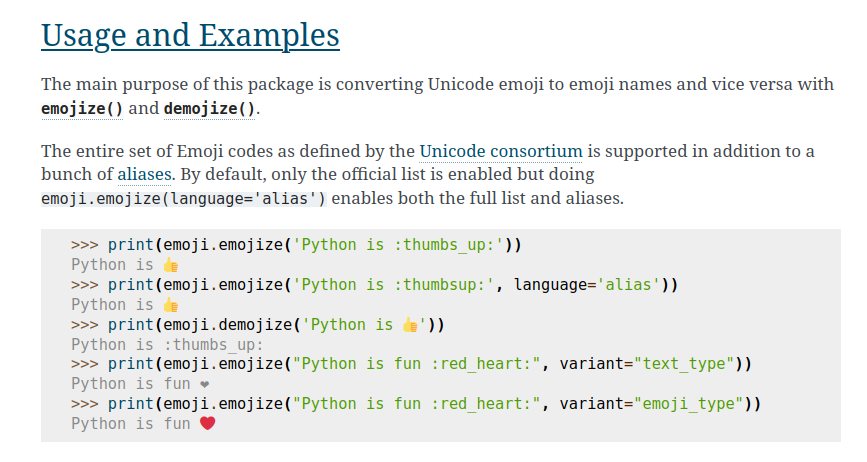

If you import a library, it's normally useful to check the documentation! As shown above, documentation often gives you examples of common cases that you might want to use the library for. It also often provides a reference for all the classes and functions in the library, which can be helpful for working out how to do something more complicated that isn't listed in the example usages.

### Doing useful(-ish) things with libraries

Once you can use libraries effectively, a lot of cool functionality becomes really accessible. Libraries can allow you to do anything from running web servers to interacting with hardware to training machine learning models, so it's a good idea to spend some time playing around with them!

In week 6, we will see some examples of using libraries to solve real-world problems!

## Readability counts!

### Why bother?

*"Everyone can code!"* is a common phrase used by motivational speakers, to attract people into trying it out. Now, think back to Week 1. How many people were in the room compared to now? A more accurate phrase is probably something like *"Everyone can code, but not everyone has the time to do it properly."*

One of the awkward realities that you're going to face is that at some point, another person might have to end up reading it. In fact, it is commonly quoted **"code is read ten times more than it is written"**.

Putting in effort to make sure your script is easy for others to understand goes a long way, especially when that someone might be you, coming back to something you wrote 3 months ago. Confusing, unclear, or badly written code is often called ***spaghetti code*** - no prizes for guessing why!

In [ ]:
def x(a, b , c):
    ac = 0
    bc = 0
    cc  = 0
    i = 0
    for d in a:
        j = 0
        for e in b:
            if j != i:
                j = j + 1
                continue
            k =  0
            for f in c:
                if k != j:
                    k = k + 1
                    continue
                if k == i:
                    match y(d, e, f):
                        case 0:
                            ac  = ac + 1
                        case 2:
                            cc = cc + 1  # add one to cc
                        case _:
                            bc += 1
                else:
                    k = k + 2
                    continue
                k = k + 1
            j = j + 1
        i = i + 1
    return y(ac, bc, cc)

def y(nOne, nTwo, nThree):
    ans = 0
    if ((nOne != nTwo) == True):
        match (not (nOne < nTwo)):
            case True:
                if nThree > nOne:
                    ans = ans + 1
                    ans += 1
            case _:
                ans += 1
                if nTwo > nThree != False:
                    return 1
                else:
                    ans += 1 
    elif True:
        return 1 if nOne > nThree else 2
    return ans
    
print(x([5, 8, 0, 3], [4, 7, 2, 4], [9, 4, 6, 1]))

# what did I just read

Can you figure out what that function does? Unless you spend an extremely long time studying it, then no, probably not. Here's a re-written version, that also works on a wider range of input parameters.

In [ ]:
def most_rounds_won(player_breakdown: list[list[int]]) -> int:
    """Get the index of the player who won the most rounds.
    
    Args:
        player_breakdown: A list containing the lists of scores for each player,
            which doesn't contain duplicates.
            
    Returns:
        The index in the input list of the player who won the most rounds.
    """
    players_in_quiz = len(player_breakdown)
    rounds_in_quiz = len(player_breakdown[0])
    
    # Regroup (transpose/zip) the 2D list to compare more easily
    # Example: [[1, 2, 3], [4, 5, 6]] into [[1, 4], [2, 5], [3, 6]]
    round_breakdown = [
        [scores[round_num] for scores in player_breakdown]
        for round_num in range(rounds_in_quiz)
    ]

    # Used to store the rounds won per player index
    counts = [0 for _ in range(players_in_quiz)]

    for round_scores in round_breakdown:
        # Find player index of max value for this round, and count it
        max_idx = round_scores.index(max(round_scores))
        counts[max_idx] += 1

    # Return the index with the most rounds won
    return counts.index(max(counts))


print(most_rounds_won([[5, 8, 0, 3], [4, 7, 2, 4], [9, 4, 6, 1]]))

### Tips for readability

In this section, we will go through a number of tips you can use to improve the readability of your code. You may be able to see where we have applied these tips in the re-written code above!

#### General tips

Remember: just because it works, doesn't mean it works well. Consider **Efficiency**, consider **Compactness**, and consider **Readability**. Take care!

To make your code more readable, there's a few things you can do:

- Use meaningful variable names which describe their contents
- Be consistent with how you name variables (such as `snake_case`)
- Use whitespace (empty lines) in your code to visually split up different sections
- Be consistent with your indentation, always using 4 spaces per indent level
- Avoid hard-coding values in your code
  - If you had an arrary of length fix, use `len(array)` rather than the number `5` to refer to its length. This makes it easier if the array changes in the future
  - For the rare case of constant values in your code (e.g. mathematical constants), consider writing them at the top of your code in `UPPER_CASE`


#### Structuring your code

Often, there are lots of different implementations that solve the same problem. Many of the constructs you've learned over the past weeks will also help with writing readable code, such as:

- Using loops for repeated actions (don't just copy and paste code blocks next to each other)
- Using grouped data structures like lists or dictionaries instead of many separate variables
- Using functions if you're going to be repeatedly using the same snippets of code
- Using classes to group common functionality that applies to the same groups of data.
- Use of built-in functions and syntax, or external code libraries

#### Type hinting

When working with function that take some parameters it can be helpful to document the types of these parameters. This lets you and other developers working on the code know what type of data should be passed to the function.

This can be achieved using **type hints**. Loosely, `:` indicates the type of a variable, `->` that a function returns a value. For functions, this looks like:

```
def function_name(param1: param1_type, param2: param2_type) -> return_type:
    pass
```

For example:

In [ ]:
# This is a function which takes an integer as its parameter, and returns a boolean
def is_even(number: int) -> bool:
    return number % 2 == 0

The type after the colon or arrow can be one of the built-in types (e.g. `int`, `float`, `bool`, ...), the name of a class (and more!)

It is important to note that type hints are **ignored by the python interpreter** therefore have no effect on the execution of your code. This means that you can pass an ``int`` to a function whose parameter is declared as a ``str`` or you can return a ``bool`` from a function whose return type is declared as ``float``. Type hints are purely for documentation and for use with external tools.

In [ ]:
def say_hello(name: str) -> None:
    print(f"Hello {name}!")
    
say_hello("The xSoc course")
# The interpreter still allows this, even though it is the wrong type
say_hello(123)

If you want to know more about type hints, you can read [their PEP](https://peps.python.org/pep-0484/), or look at tools like [MyPy](https://mypy.readthedocs.io/en/stable/) which check the type hints.

#### Docstrings

We have already seen how to write comments (lines which are ignored by the Python interpreter) using the `#` character. However, there is another way to ignore a line: creating a string, but not assigning it to a variable. For example

In [ ]:
# This is a comment

"This line is also ignored by Python"

"""
This is a multi-line string, which isn't assigned to anything.

This is how we write multi-line comments in python.
"""


Python docstrings are string literals which are written right after the definition of a function, class, or module. They are used to describe what their code block does. They are also automatically associated with their object as the `__doc__` attribute, so they can be printed and read later within the interpreter. For example:

In [ ]:
def square(number: int) -> int:
    """Takes a number, and returns its square."""
    return number ** 2

print("The square function: {square.__doc__}")
print(square(2))

Docstrings are often more helpful than inline comments for a number of reasons, including:

- Inline comments often become out of date if the code they are about changes, whereas docstrings talk more about interfaces than implementation
- They can be automatically turned into documentation

You can read more about docstrings [in their PEP](https://peps.python.org/pep-0257/). Different people structure how they write docstrings in different ways, but you can read more about [Google style docstrings here](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).

#### Extension: List comprehensions



---

# Week 5 Exercises

## Exercise 1

In the notes above, we saw an example of turning a dictionary representation of data and methods for a square into a class.

Below is another dictionary representation of some data and methods, this time describing cars. Your job is to turn it into a simple class which does the same thing.

In [ ]:
car = {
    "miles_per_gallon": 10,
    "fuel_tank_size": 50,
    "colour": "blue",
}

def calculate_range(car):
    return car["miles_per_gallon"] * car["fuel_tank_size"]

In [ ]:
# Create a class for a car with the same properties and methods as above
# If you get stuck, try looking back at the notes and see how we did it
# for the square example.


# Create an object instance of the class with the data from the above


# Call the range method of the object to find its range



## Exercise 2

In this exercise, we are going to combine what we've learnt about libraries with what we know about classes to do something useful(-ish).

The `requests` library lets us make http requests to access content on the web. As it is not part of the standard library **you will need to install it yourself** using the `pip` command line tool we discussed above.

Once the library is installed, the next thing to do is normally to look at its documentation. For `requests`, the quickstart page can be found here: https://requests.readthedocs.io/en/latest/user/quickstart/ . This shows us how to use it to make a web request:

In [ ]:
import requests

response = requests.get("https://xkcd.com/")
print(response)

However, if you run this code it doesn't give you what you might expect! Instead of giving you the HTML for the website, it just prints "<Response [200]>"!

This is because `response` is actually an object, which contains lots of different data about the response to the request we made! We can confirm this as we say before by using `__class__`

In [ ]:
print(response.__class__)

Your second challenge is to try to get the HTML content from this response object, so you can read what the website says. This might seem impossible at first, since you don't know what the properties and methods the class has, but again documentation comes to the rescue!

Look at this website: https://requests.readthedocs.io/en/latest/api/#requests.Response , and try to find the property which contains the HTML code, and print it out.

In [ ]:
# Print out the HTML of the response using a property of the object
# from the documentation



As some extra fun(?) you can look at the other properties and methods of the classes and experiment with what they do!

Hopefully you can see how objects are useful in the real world, especially when interacting with libraries, as lots of them are just collections of objects.

# Exercise 3

This exercise is about writing readable code. Below is some code which is designed to ____. It is **very bad™** , and your job is to rewrite it to make it more readable.

As a reminder from the notes above, these a some things you may want to think about when re-writing the code to make it more readable:

- Meaningful and consistent variable names
- Use empty lines to split up sections
- Be consistent with indentations
- Avoid hard-coded constant values
- Use loops and functions to avoide duplication
- Add type hints
- Add docstrings to describe what functions do

In [ ]:
# Re-write the code above so it does the same thing but is more readable



🖋️ ***This week was written by [Computing Society](https://go.uwcs.uk/links)***